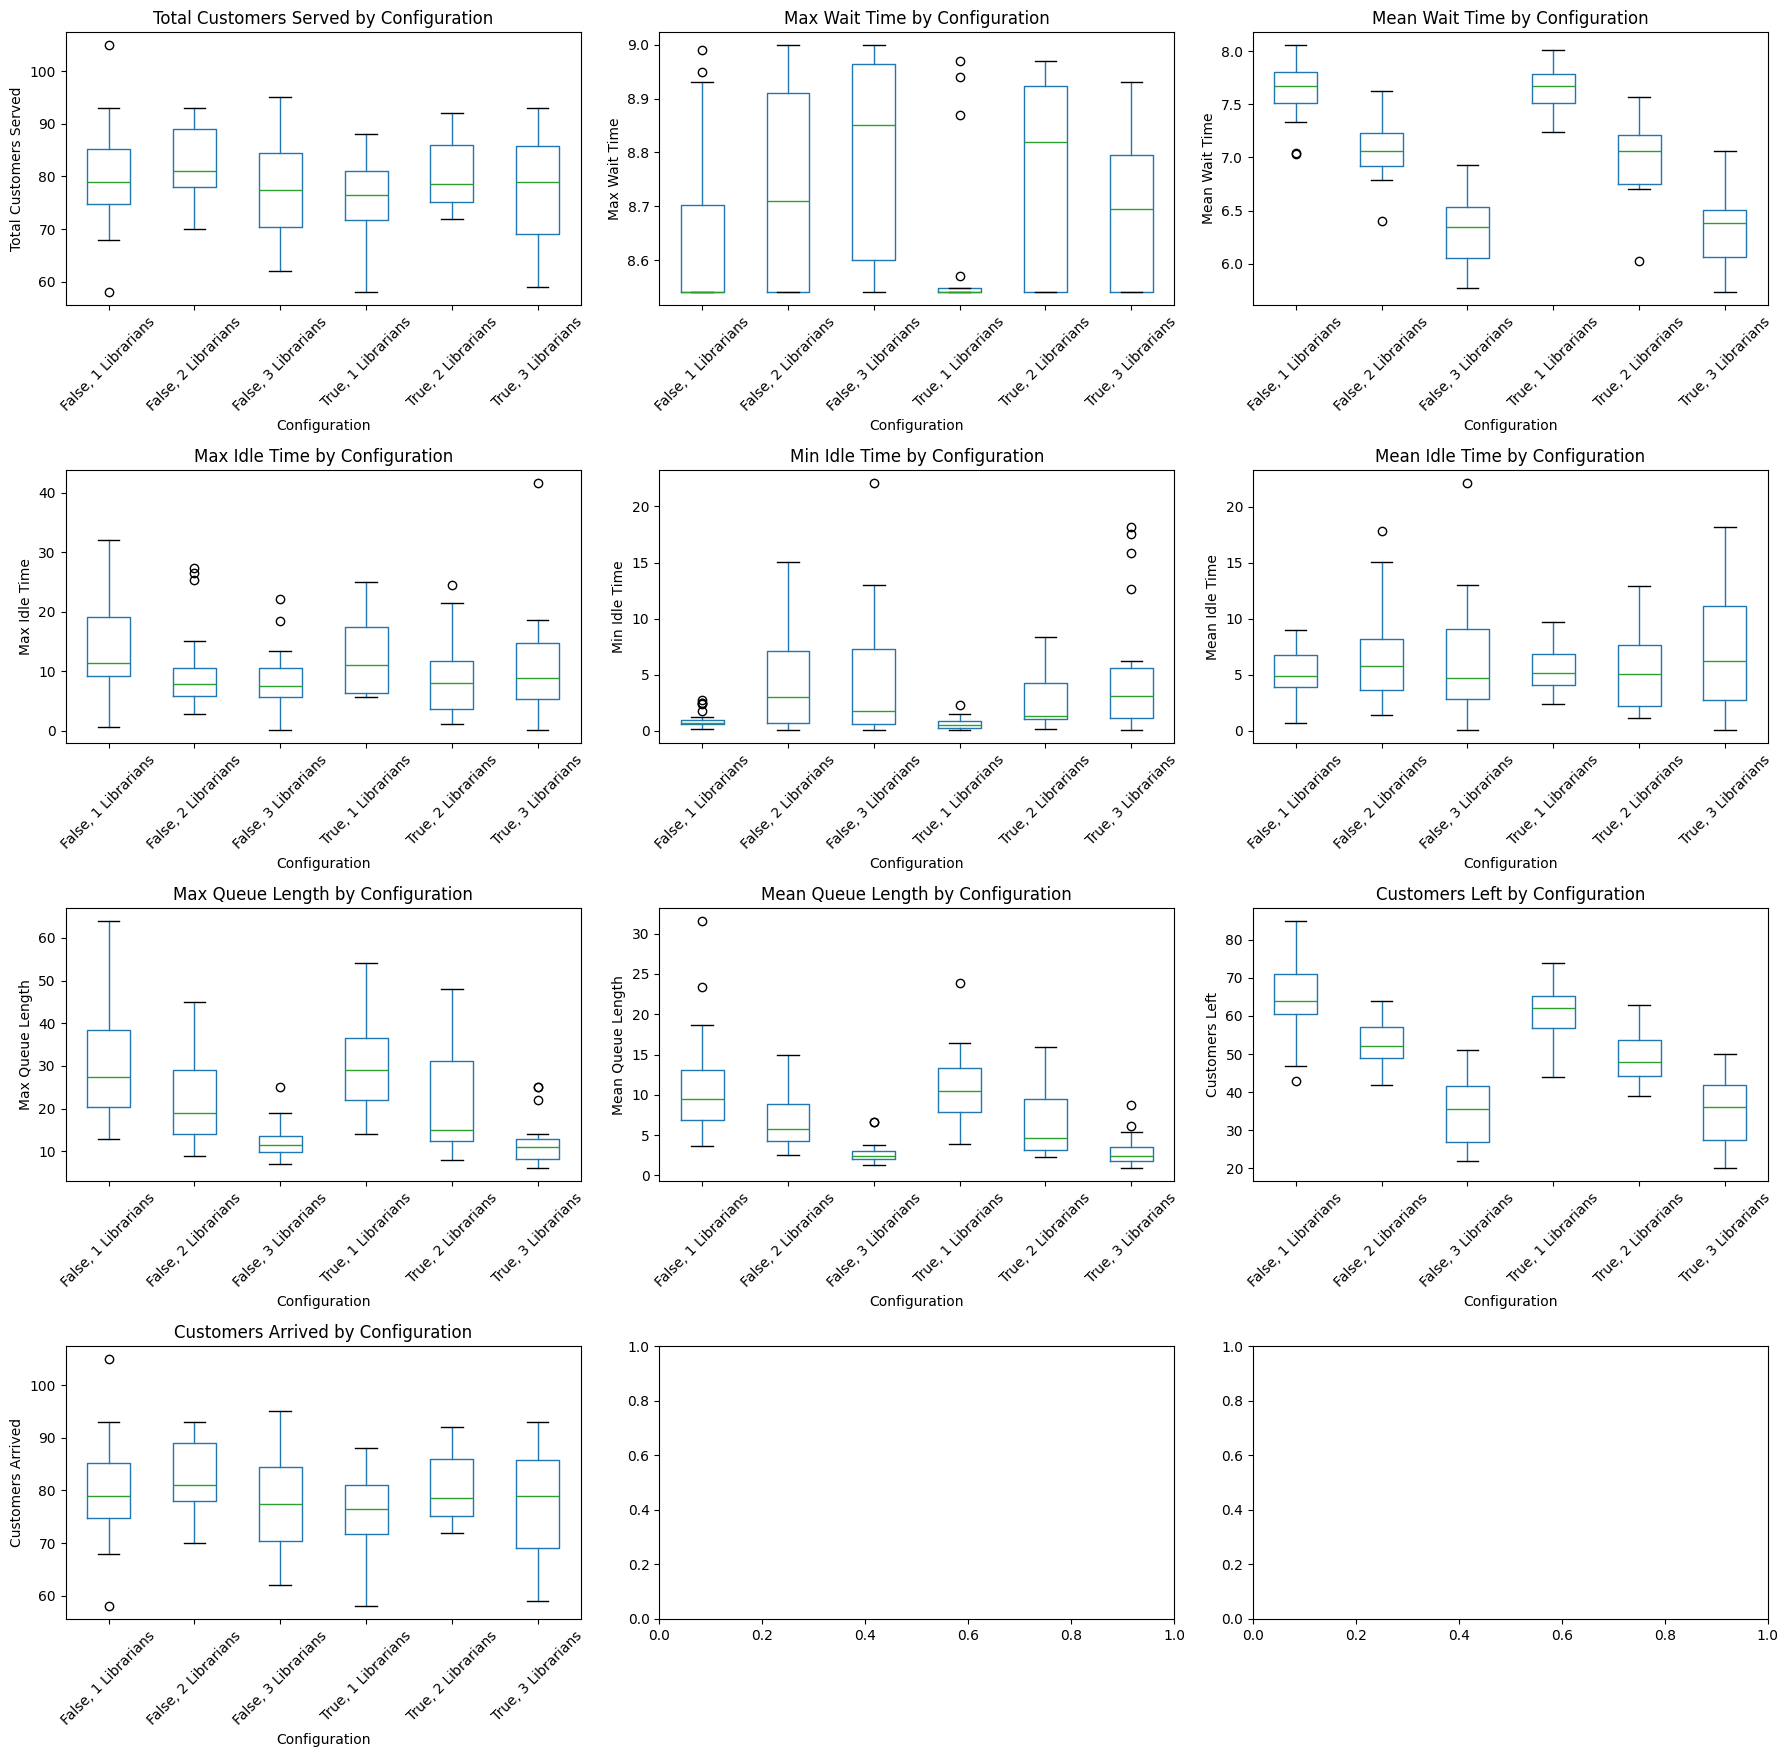

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('all_simulations_statistics.csv')

# # Convertir la columna 'Policy' a cadena para facilitar el manejo
# data['Policy'] = data['Policy'].astype(str)

data2 = data.copy()
# Crear una columna para representar las configuraciones
data2['Configuration'] = data2['SJF'].astype(str) + ', ' + data2['Num Librarians'].astype(str) + ' Librarians'

# Lista de las columnas de interés
columns_of_interest = [
    'Total Customers Served', 'Max Wait Time', 'Mean Wait Time', 'Max Idle Time', 
    'Min Idle Time', 'Mean Idle Time', 'Max Queue Length', 'Mean Queue Length', 'Customers Left', 'Customers Arrived'
]

# Configurar el grid de gráficos
num_columns = 3
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 18))
axes = axes.flatten()

# Crear boxplots para cada columna de interés
for i, column in enumerate(columns_of_interest):
    # Crear el boxplot
    data2.boxplot(column=column, by='Configuration', ax=axes[i], grid=False)
    axes[i].set_title(f'{column} by Configuration')
    axes[i].set_xlabel('Configuration')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar diseño para evitar superposición de gráficos
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superfluo generado por pandas
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

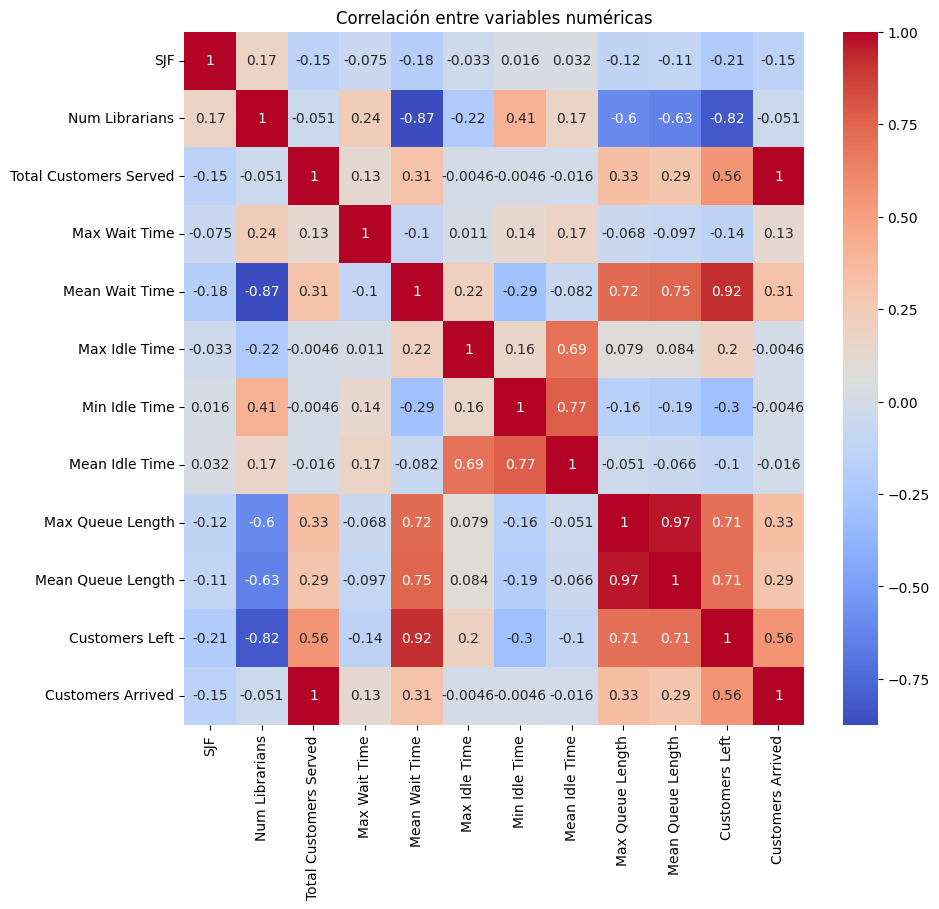

In [3]:
# Heatmap para visualizar la correlación entre todas las variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

In [5]:
import scipy.stats as stats

group1 = data[data['SJF'] == True]['Customers Left']
group2 = data[data['SJF'] == False]['Customers Left']
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -2.3529999127427867, p-value: 0.020263305549926506


In [8]:
import scipy.stats as stats

group1 = data[data['SJF'] == True]['Mean Queue Length']
group2 = data[data['SJF'] == False]['Mean Queue Length']
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -1.2112790229136863, p-value: 0.22818842125651745


In [9]:
spearman_corr, p_value = stats.spearmanr(data['Num Librarians'], data['Mean Idle Time'])

print(f'Spearman correlation: {spearman_corr}, p-value: {p_value}')

Spearman correlation: 0.057302984534544556, p-value: 0.532428440469636


In [18]:
# no supuestos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar los datos (asegúrate de tener el DataFrame `data` cargado)
# data = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario

# Realizar el ANOVA
data.rename(columns={'Num Librarians': 'Num_Librarians', 'Mean Idle Time': 'Mean_Idle_Time'}, inplace=True)

model = ols('Mean_Idle_Time ~ C(Num_Librarians)', data=data).fit()  # Asegúrate de usar el DataFrame correcto
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)



                        sum_sq     df         F    PR(>F)
C(Num_Librarians)    60.557686    2.0  1.815723  0.167237
Residual           1967.758314  118.0       NaN       NaN


Shapiro-Wilk Test (3 Librarians without SJF): ShapiroResult(statistic=0.8703274007635691, pvalue=0.02751114990997972)
Shapiro-Wilk Test (2 Librarians with SJF): ShapiroResult(statistic=0.9171503244367765, pvalue=0.20004658725531488)


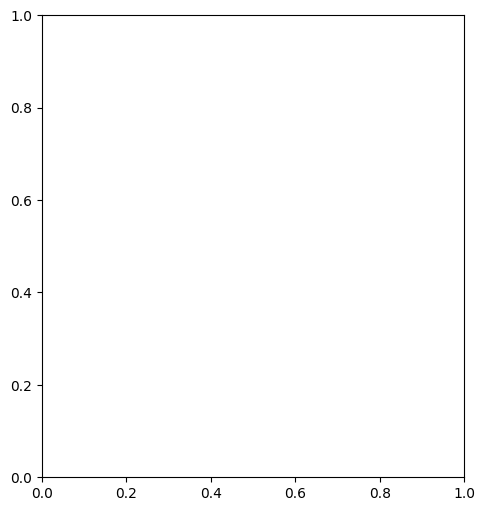

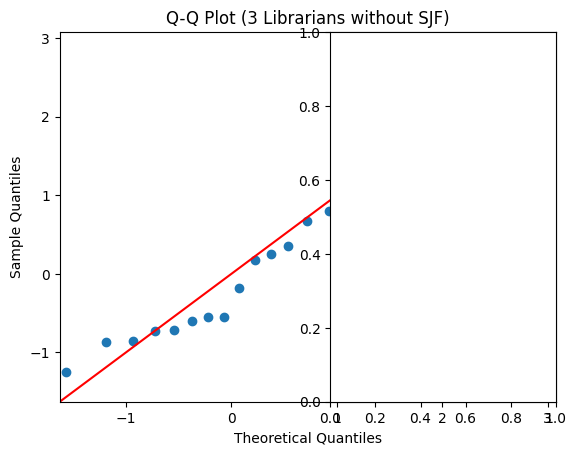

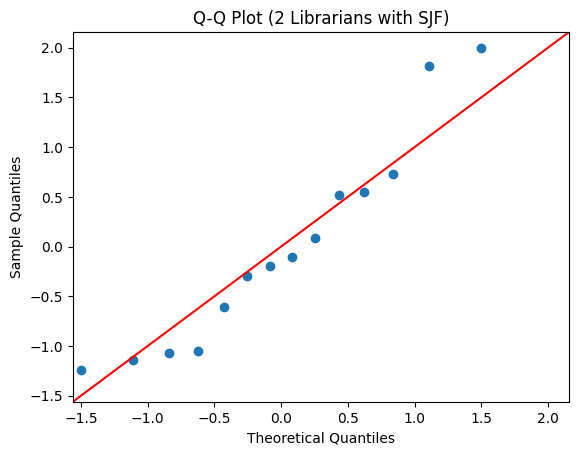

Levene's Test: LeveneResult(statistic=0.8957757546868974, pvalue=0.3520138375741766)
T-test Result: TtestResult(statistic=0.6122616012967379, pvalue=0.5453051696833697, df=28.0)


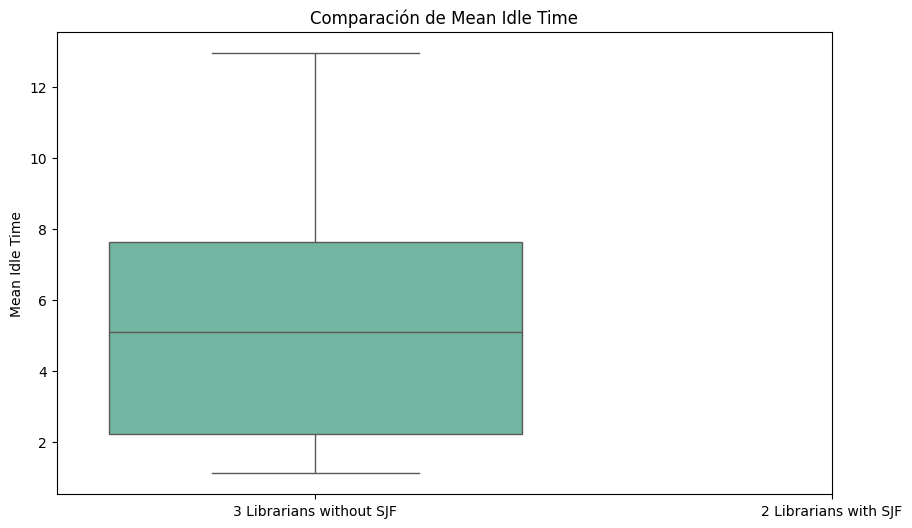

In [19]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario
df = data

# Renombrar las columnas para eliminar espacios
df.rename(columns={'Num Librarians': 'Num_Librarians', 'Mean Idle Time': 'Mean_Idle_Time'}, inplace=True)

# Filtrar los datos para las dos configuraciones específicas
three_librarians_no_sjf = df[(df['Num_Librarians'] == 3) & (df['SJF'] == False)]
two_librarians_with_sjf = df[(df['Num_Librarians'] == 2) & (df['SJF'] == True)]

# Datos para las pruebas
data_no_sjf = three_librarians_no_sjf['Mean_Idle_Time']
data_with_sjf = two_librarians_with_sjf['Mean_Idle_Time']

# Prueba de normalidad (Shapiro-Wilk)
shapiro_test_no_sjf = shapiro(data_no_sjf)
shapiro_test_with_sjf = shapiro(data_with_sjf)
print("Shapiro-Wilk Test (3 Librarians without SJF):", shapiro_test_no_sjf)
print("Shapiro-Wilk Test (2 Librarians with SJF):", shapiro_test_with_sjf)

# Q-Q Plot para normalidad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sm.qqplot(data_no_sjf, line ='45', fit=True)
plt.title('Q-Q Plot (3 Librarians without SJF)')

plt.subplot(1, 2, 2)
sm.qqplot(data_with_sjf, line ='45', fit=True)
plt.title('Q-Q Plot (2 Librarians with SJF)')

plt.show()

# Prueba de homogeneidad de varianzas (Levene)
levene_test = levene(data_no_sjf, data_with_sjf)
print("Levene's Test:", levene_test)

# Prueba t de Student para muestras independientes
t_test_result = ttest_ind(data_no_sjf, data_with_sjf, equal_var=(levene_test.pvalue > 0.05))
print("T-test Result:", t_test_result)

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data_no_sjf, data_with_sjf], palette="Set2")
plt.xticks([0, 1], ['3 Librarians without SJF', '2 Librarians with SJF'])
plt.title('Comparación de Mean Idle Time')
plt.ylabel('Mean Idle Time')
plt.show()


Mann-Whitney U Test Result: MannwhitneyuResult(statistic=125.0, pvalue=0.6033201802180682)


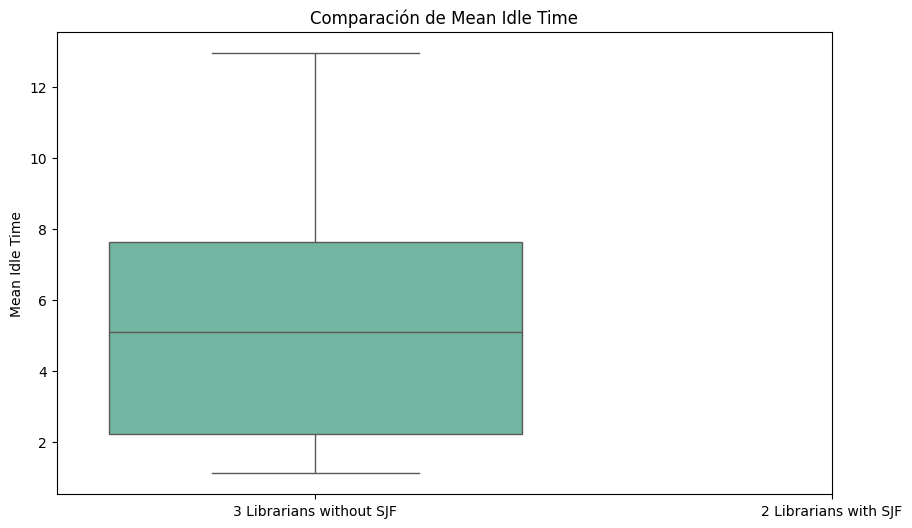

In [20]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario

# Renombrar las columnas para eliminar espacios
df.rename(columns={'Num Librarians': 'Num_Librarians', 'Mean Idle Time': 'Mean_Idle_Time'}, inplace=True)

# Filtrar los datos para las dos configuraciones específicas
three_librarians_no_sjf = df[(df['Num_Librarians'] == 3) & (df['SJF'] == False)]
two_librarians_with_sjf = df[(df['Num_Librarians'] == 2) & (df['SJF'] == True)]

# Datos para las pruebas
data_no_sjf = three_librarians_no_sjf['Mean_Idle_Time']
data_with_sjf = two_librarians_with_sjf['Mean_Idle_Time']

# Prueba de Mann-Whitney U
mannwhitney_test = mannwhitneyu(data_no_sjf, data_with_sjf, alternative='two-sided')
print("Mann-Whitney U Test Result:", mannwhitney_test)

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data_no_sjf, data_with_sjf], palette="Set2")
plt.xticks([0, 1], ['3 Librarians without SJF', '2 Librarians with SJF'])
plt.title('Comparación de Mean Idle Time')
plt.ylabel('Mean Idle Time')
plt.show()


Shapiro-Wilk Test (SJF=True): ShapiroResult(statistic=0.9777309453688143, pvalue=0.4345004321899934)
Shapiro-Wilk Test (SJF=False): ShapiroResult(statistic=0.9749458169351303, pvalue=0.17987503344561262)


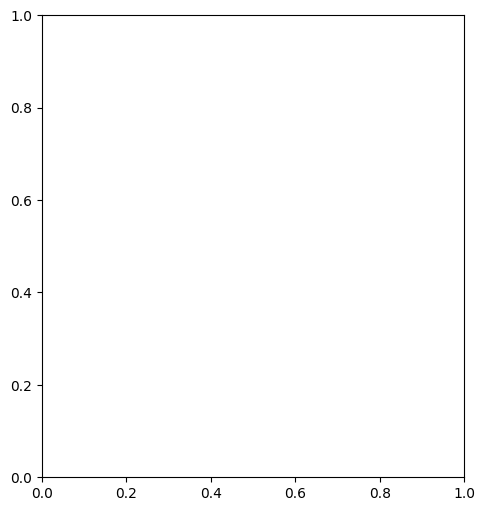

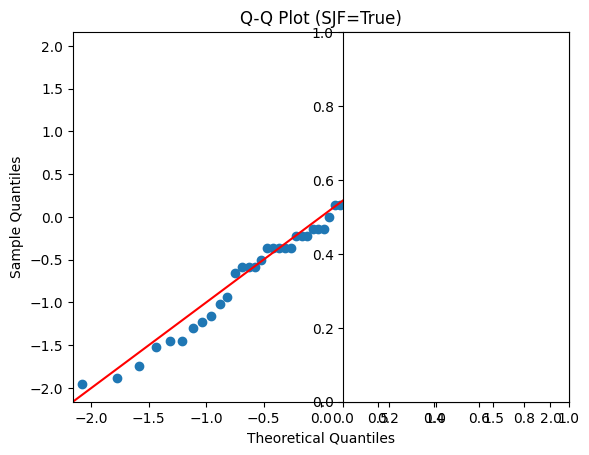

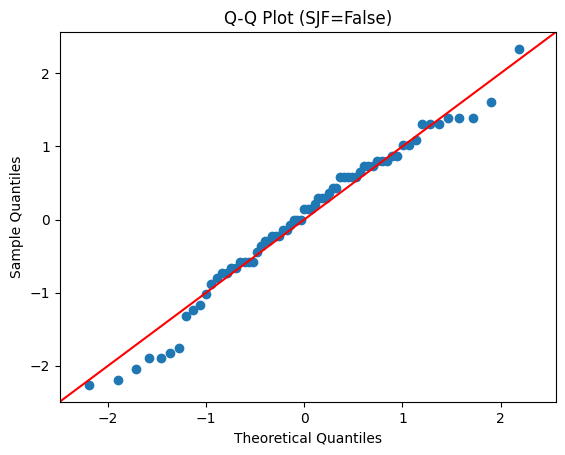

Levene's Test: LeveneResult(statistic=0.0376145575639114, pvalue=0.846549838899435)
T-statistic: -2.3529999127427867, p-value: 0.020263305549926506


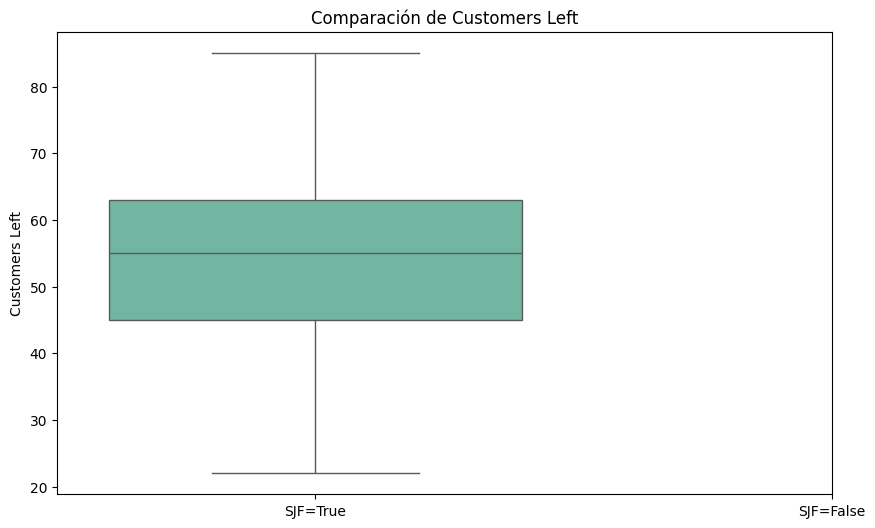

In [21]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario

# Filtrar los datos para los dos grupos específicos
group1 = df[df['SJF'] == True]['Customers Left']
group2 = df[df['SJF'] == False]['Customers Left']

# Evaluar supuestos

# 1. Prueba de Normalidad (Shapiro-Wilk)
shapiro_test_group1 = shapiro(group1)
shapiro_test_group2 = shapiro(group2)
print("Shapiro-Wilk Test (SJF=True):", shapiro_test_group1)
print("Shapiro-Wilk Test (SJF=False):", shapiro_test_group2)

# Q-Q Plots para Normalidad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sm.qqplot(group1, line='45', fit=True)
plt.title('Q-Q Plot (SJF=True)')

plt.subplot(1, 2, 2)
sm.qqplot(group2, line='45', fit=True)
plt.title('Q-Q Plot (SJF=False)')

plt.show()

# 2. Prueba de Homogeneidad de Varianzas (Levene)
levene_test = levene(group1, group2)
print("Levene's Test:", levene_test)

# Realizar la prueba t de Student si se cumplen los supuestos
if shapiro_test_group1.pvalue > 0.05 and shapiro_test_group2.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
else:
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f'T-statistic: {t_stat}, p-value: {p_value}')

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=[group1, group2], palette="Set2")
plt.xticks([0, 1], ['SJF=True', 'SJF=False'])
plt.title('Comparación de Customers Left')
plt.ylabel('Customers Left')
plt.show()
